<a href="https://colab.research.google.com/github/DesaData/DesaData/blob/main/Housing_Price_Competition_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [76]:
#Import the data#
import pandas as pd
import numpy as np

In [77]:
df_train = pd.read_csv("train.csv")
df_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [78]:
#Visulize the missing values#
mv = df_train.isnull().mean()*100
mv = mv[mv > 0]
mv = mv.sort_values(ascending=False)

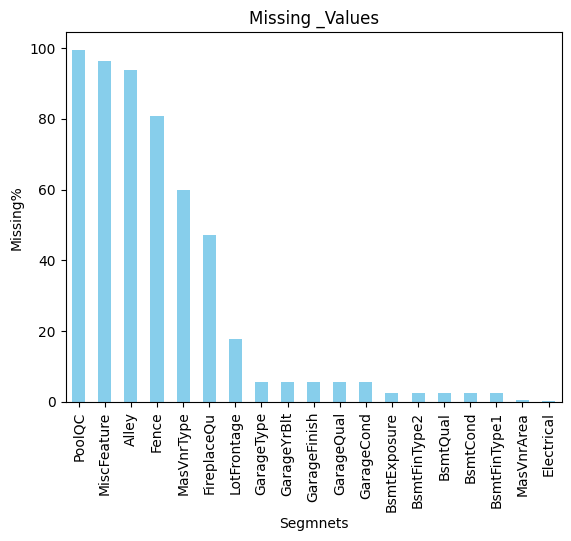

In [79]:

import matplotlib.pyplot as plt
mv.plot(kind='bar', color="skyblue")
plt.title("Missing _Values")
plt.xlabel("Segmnets")
plt.ylabel("Missing%")
plt.show()




In [80]:
df_train.drop(columns = ["PoolQC", "MiscFeature", "Alley", "Fence", "MasVnrType", "FireplaceQu"], inplace=True)


In [81]:
 #Select numeric columns#
df_numeric = df_train.select_dtypes(include=['number'])

# Interpolate missing values in the numeric columns using linear method
df_numeric = df_numeric.interpolate(method='linear')

In [82]:


df_categorical = df_train.select_dtypes(exclude=['number'])
df_categorical = df_train.select_dtypes(exclude=['number'])

# Fill missing values in each categorical column with its mode
for column in df_categorical.columns:
  #Starts a loop that goes through each column  to apply mode separately#
  mode_value = df_categorical[column].mode()[0]
  #Calculates mode#
  df_categorical[column] = df_categorical[column].fillna(mode_value)


In [83]:
df_train.interpolated = pd.concat([df_numeric, df_categorical], axis=1)

<ipython-input-83-4883227d2bff>:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  df_train.interpolated = pd.concat([df_numeric, df_categorical], axis=1)


In [84]:
#Update the data#
df_train = df_train.interpolated
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 75 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   LotFrontage    1460 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   OverallQual    1460 non-null   int64  
 5   OverallCond    1460 non-null   int64  
 6   YearBuilt      1460 non-null   int64  
 7   YearRemodAdd   1460 non-null   int64  
 8   MasVnrArea     1460 non-null   float64
 9   BsmtFinSF1     1460 non-null   int64  
 10  BsmtFinSF2     1460 non-null   int64  
 11  BsmtUnfSF      1460 non-null   int64  
 12  TotalBsmtSF    1460 non-null   int64  
 13  1stFlrSF       1460 non-null   int64  
 14  2ndFlrSF       1460 non-null   int64  
 15  LowQualFinSF   1460 non-null   int64  
 16  GrLivArea      1460 non-null   int64  
 17  BsmtFullBath   1460 non-null   int64  
 18  BsmtHalf

In [86]:
X = df_train.drop(columns=['SalePrice'])
y = df_train['SalePrice']
from sklearn.linear_model import LinearRegression


In [102]:
!pip install category_encoders
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
from category_encoders import OneHotEncoder

model = make_pipeline(
    OneHotEncoder(use_cat_names=True),
    LinearRegression()
)

In [103]:
model.fit(X, y)

Pipeline(steps=[('onehotencoder',
                 OneHotEncoder(cols=['MSZoning', 'Street', 'LotShape',
                                     'LandContour', 'Utilities', 'LotConfig',
                                     'LandSlope', 'Neighborhood', 'Condition1',
                                     'Condition2', 'BldgType', 'HouseStyle',
                                     'RoofStyle', 'RoofMatl', 'Exterior1st',
                                     'Exterior2nd', 'ExterQual', 'ExterCond',
                                     'Foundation', 'BsmtQual', 'BsmtCond',
                                     'BsmtExposure', 'BsmtFinType1',
                                     'BsmtFinType2', 'Heating', 'HeatingQC',
                                     'CentralAir', 'Electrical', 'KitchenQual',
                                     'Functional', ...],
                               use_cat_names=True)),
                ('linearregression', LinearRegression())])

In [108]:
df_test = pd.read_csv("test.csv")

# Apply the same column dropping as in training data
df_test.drop(columns = ["PoolQC", "MiscFeature", "Alley", "Fence", "MasVnrType", "FireplaceQu"], inplace=True)

# Separate numeric and categorical columns in the test data
df_test_numeric = df_test.select_dtypes(include=['number'])
df_test_numeric = df_test_numeric.interpolate(method='linear')
#Categorical#
df_test_categorical = df_test.select_dtypes(exclude=['number'])

for column in df_test_categorical.columns:
    if df_test_categorical[column].isnull().any(): # Check if column has NaNs
        # Calculate mode for the current categorical column in the test data
        # Use .fillna with axis=0 to fill column-wise
        mode_value = df_test_categorical[column].mode()[0]
        df_test_categorical[column] = df_test_categorical[column].fillna(mode_value)

# Concatenate the processed numeric and categorical test dataframes
df_test_processed = pd.concat([df_test_numeric, df_test_categorical], axis=1)
df_test = df_test_processed
X_test = df_test[X.columns] # Select columns based on X
# Re-check for NaNs just in case
print(X_test.isnull().sum().sum()) # Should print 0 if successful

predictions = model.predict(X_test)

0


In [109]:
predictions = model.predict(X_test)

In [112]:
submission = pd.DataFrame({
    'Id' : X_test['Id'],
    'SalePrice' : predictions
})

In [117]:

# Save the submission DataFrame to a CSV file
submission.to_csv("submission.csv", index=False)